In [50]:
import pandas as pd
data = pd.read_csv('daily-min-temperatures.csv', parse_dates = [0], index_col = 0)
if data.shape[1]==1:
    data = data.iloc[:,0]

data.head(5)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [51]:
df = pd.DataFrame()
df['Days'] = data.index.day
df['Months'] = data.index.month
df['Temperature'] = data.values
df.head(9)

,Days,Months,Temperature
0,1,1,20.7
1,2,1,17.9
2,3,1,18.8
3,4,1,14.6
4,5,1,15.8
5,6,1,15.8
6,7,1,15.8
7,8,1,17.4
8,9,1,21.8


In [52]:
temp = pd.DataFrame(data.values)
dataframe = pd.concat([temp.shift(2), temp.shift(1), temp], axis = 1)
dataframe.columns = ['temp-2', 'temp-1', 'temp']
print(dataframe.head(5))

   temp-2  temp-1  temp
0     NaN     NaN  20.7
1     NaN    20.7  17.9
2    20.7    17.9  18.8
3    17.9    18.8  14.6
4    18.8    14.6  15.8


In [53]:
shifted = temp.shift(0)
window = shifted.rolling(window=4)
mean = window.mean()
dataframe = pd.concat([mean, temp], axis=1)
dataframe.columns = ['mean', 'temp']
print(dataframe.head(9))

     mean  temp
0     NaN  20.7
1     NaN  17.9
2     NaN  18.8
3  18.000  14.6
4  16.775  15.8
5  16.250  15.8
6  15.500  15.8
7  16.200  17.4
8  17.700  21.8


In [54]:
shifted = temp.shift(0)
window = shifted.rolling(window=4)
mean = window.mean()
max = window.max()
min = window.min()
dataframe = pd.concat([min, max, mean, temp], axis =1)
dataframe.columns = ['min', 'max', 'mean', 'temp']
print(dataframe.head(9))

    min   max    mean  temp
0   NaN   NaN     NaN  20.7
1   NaN   NaN     NaN  17.9
2   NaN   NaN     NaN  18.8
3  14.6  20.7  18.000  14.6
4  14.6  18.8  16.775  15.8
5  14.6  18.8  16.250  15.8
6  14.6  15.8  15.500  15.8
7  15.8  17.4  16.200  17.4
8  15.8  21.8  17.700  21.8


In [15]:
window = temp.expanding()
min = window.min()
max = window.max()
mean = window.mean()
dataframe = pd.concat([min, max, mean, temp], axis = 1)
dataframe.columns = ['min', 'max', 'mean', 'temp']
print(dataframe.head(9))

    min   max       mean  temp
0  20.7  20.7  20.700000  20.7
1  17.9  20.7  19.300000  17.9
2  17.9  20.7  19.133333  18.8
3  14.6  20.7  18.000000  14.6
4  14.6  20.7  17.560000  15.8
5  14.6  20.7  17.266667  15.8
6  14.6  20.7  17.057143  15.8
7  14.6  20.7  17.100000  17.4
8  14.6  21.8  17.622222  21.8


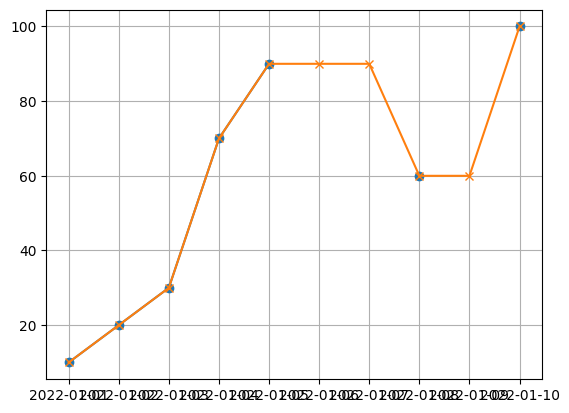

In [23]:
import matplotlib.pyplot as plt
import numpy as np
date = pd.date_range(start = '2022-01-01', periods = 10, freq = 'D')
value = [10, 20, 30, 70, 90, np.nan, np.nan, 60, np.nan, 100]
df = pd.Series(value, index = date)

forfill = df.ffill()
plt.plot(df.index, df.values, marker = 'o')
plt.plot(forfill.index, forfill.values, marker = 'x')
plt.grid()
plt.show()

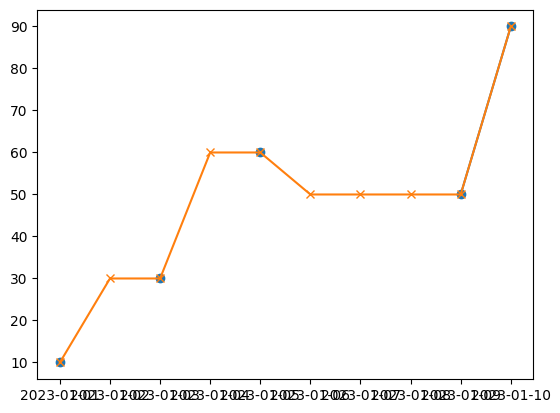

In [21]:
date = pd.date_range(start = '2023-01-01', periods = 10, freq = 'D')
values = [10, np.nan, 30, np.nan, 60, np.nan, np.nan, np.nan, 50, 90]
df = pd.Series(values, index = date)

bfill = df.bfill()
plt.plot(df.index, df.values, marker = 'o')
plt.plot(bfill.index, bfill.values, marker = 'x')
plt.show()

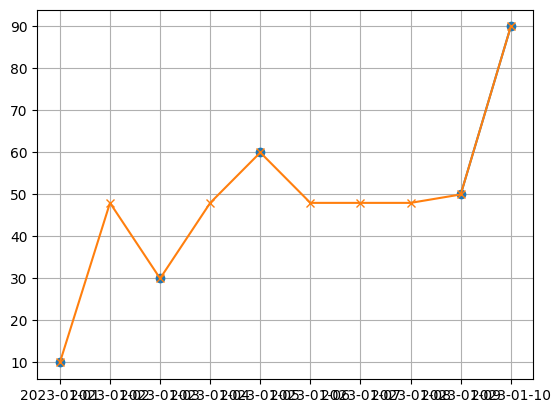

In [24]:
date = pd.date_range(start = '2023-01-01', periods = 10, freq = 'D')
values = [10, np.nan, 30, np.nan, 60, np.nan, np.nan, np.nan, 50, 90]
df = pd.Series(values, index = date)

mean = df.fillna(df.mean())
plt.plot(df.index, df.values, marker = 'o')
plt.plot(mean.index, mean.values, marker = 'x')
plt.grid()
plt.show()

In [36]:
import pandas as pd
df_p = pd.read_csv('nvda.csv', parse_dates = [0], index_col = 0).squeeze()


In [37]:
print(df_p.head(9))

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
Name: Temp, dtype: float64


In [38]:
print(df_p['1981-01'])

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24    16.0
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
1981-01-31    15.4
Name: Temp, dtype: float64


C:\Users\Aneesh Mada\AppData\Local\Temp\ipykernel_3296\2538600888.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Aneesh Mada\AppData\Local\Temp\ipykernel_3296\2538600888.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


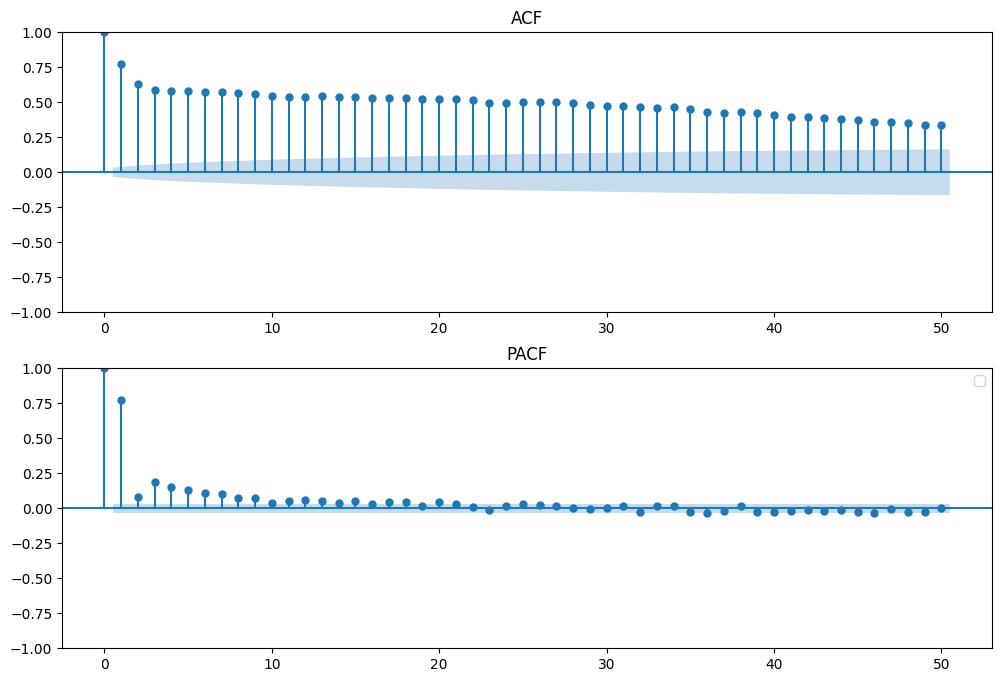

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,figsize=(12,8))
plot_acf(df_p, lags = 50, ax = ax[0])
ax[0].set_title('ACF')
plt.legend()

plot_pacf(df_p, lags = 50, ax = ax[1], method = 'ols')
ax[1].set_title('PACF')
plt.legend()

plt.show()

In [46]:
from statsmodels.tsa.stattools import pacf
pacf = pacf(df_p, nlags = 10, method = 'ols')
print(pacf)

[1.         0.77431043 0.07708886 0.19018211 0.15130926 0.13038339
 0.10963739 0.10344817 0.07499019 0.07243249 0.03634852]


In [48]:
from statsmodels.tsa.stattools import acf
acf = acf(df_p, nlags = 10)
print(acf)

[1.         0.774268   0.6302866  0.58529312 0.57774567 0.57728013
 0.57510412 0.57437039 0.56782622 0.56120131 0.54668689]


In [55]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Temperature'])
print("adf", result[0])
print("p-values", result[1])

adf -4.444804924611686
p-values 0.00024708263003611256
